In [1]:
import pandas as pd

In [2]:
import pandas as pd
df = pd.read_csv('../data/inputs/raw/insurance.csv')
df 

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [3]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


I have extracted a file path and imported the CSV file from the Kaggle Dataset on the table above, I am now proceeding to transform the data but before I did that I needed to understand more clearly on the data I was looking at using the .info and .describe method.

In [4]:
df.head()
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

I also chose this route to help me have a preview of the data whilst confirming it loaded correctly. This also lets me know what values are missing in each column.

In [5]:
df.drop_duplicates(inplace=True)

Dropping any duplicates is a good call as it removes any duplicate rows from the dataset.

In [6]:
df.fillna(df.select_dtypes(include=['number']).mean(), inplace=True)

In [7]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

I replaced the missing data and at first an error was shown as the original code only applied to numeric columns. I then adjusted the code to fit both string and [numbers].

I also wanted to confirm the changes with the df.isnull method and all seems well.

In [8]:
df["smoker_encoded"] = df["smoker"].map({"yes": 1, "no": 0})
df["region_encoded"] = df["region"].astype("category").cat.codes

This transforms the data to make it process numerically to make it easier to manage. This is encoding the categories.

In [9]:
def bmi_category(bmi):
    if bmi < 18.5:
        return "Underweight"
    elif bmi < 24.9:
        return 'Normal'
    elif bmi < 29.9:
        return 'Overweight'
    else:
        return 'Obese'
df['bmi_category'] = df['bmi'].apply(bmi_category)

In [10]:
df.dtypes

age                 int64
sex                object
bmi               float64
children            int64
smoker             object
region             object
charges           float64
smoker_encoded      int64
region_encoded       int8
bmi_category       object
dtype: object

I used the IF, ELIF, ELSE method to transform and categorise the BMI values into four categories: Underweight, Normal, Overweight, and Obese.

In [11]:
df.to_csv("processed_data.csv", index=False) #kept the location location simple

This code above has saved my cleaned up data for any future anaylsis. I did it this way to avoid changing the file location. I did this to load the data to make sure all was well.

In [12]:
print(df[['sex', 'smoker']].head())


print(df.describe())


assert df.isnull().sum().sum() == 0, "There are still missing values!" #what text will show up


      sex smoker
0  female    yes
1    male     no
2    male     no
3    male     no
4    male     no
               age          bmi     children       charges  smoker_encoded  \
count  1337.000000  1337.000000  1337.000000   1337.000000     1337.000000   
mean     39.222139    30.663452     1.095737  13279.121487        0.204936   
std      14.044333     6.100468     1.205571  12110.359656        0.403806   
min      18.000000    15.960000     0.000000   1121.873900        0.000000   
25%      27.000000    26.290000     0.000000   4746.344000        0.000000   
50%      39.000000    30.400000     1.000000   9386.161300        0.000000   
75%      51.000000    34.700000     2.000000  16657.717450        0.000000   
max      64.000000    53.130000     5.000000  63770.428010        1.000000   

       region_encoded  
count     1337.000000  
mean         1.516081  
std          1.105208  
min          0.000000  
25%          1.000000  
50%          2.000000  
75%          2.000000  
max

This final step validates that there are no missing values in the dataset. If there are, it will raise an assertion error with the message "There are still missing values!".

I have now successfully done : Extract, Transformed, Loaded and Validated the dataset. I am now moving onto visualisation.

                                          ________________________

## Data Visualisation Using : Matplotlib, Seaborn & Plotly

For this section of the project, we will use visualisation to explore the data 

For the first plot, I decided to make a Bar Chart for age - related comparisions as I feel that focusing on age can be a great way to have an undertsanding on insurance costs and its affects as a whole.

In [13]:
import matplotlib.pyplot as plt  
import seaborn as sns 

In [14]:
import pandas as pd

# I Did this as pandas didnt seem to define df 
df = pd.read_csv("processed_data.csv")


Above, I had to tell pandas the dataset I was using as the original code I put had said that 'df' hadnt been defined. Doing this told the system where I was getting the data from.

In [15]:
#age groups created
df['age_group'] = pd.cut(df['age'], bins=[18, 25, 35, 45, 55, 65], 
                         labels=['18-25', '26-35', '36-45', '46-55', '56-65'])

# I Grouped and calculate average charges
age_avg_charges = df.groupby('age_group', observed=True)['charges'].mean().reset_index() #added 'observed=True' to avoid warning



Plot 1: Barchart

In [16]:
import seaborn as sns

C:\Users\faiza\AppData\Local\Temp\ipykernel_23852\231279000.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=age_avg_charges, x='age_group', y='charges', palette='coolwarm')


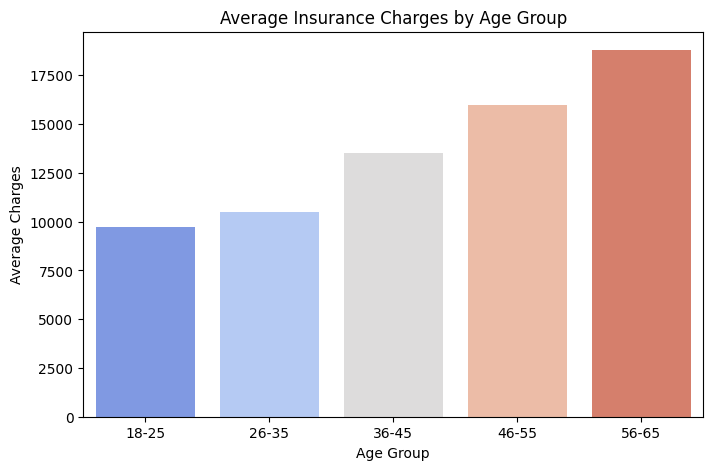

In [17]:

plt.figure(figsize=(8, 5))
sns.barplot(data=age_avg_charges, x='age_group', y='charges', palette='coolwarm')
plt.title('Average Insurance Charges by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Average Charges')
plt.show()


The Bar Chart above shows the: Age Group and Average Charges. I had titles it "Average Insurance Charges by Age Group" to reflect my findings. It also highlights age impact clearly. You will see a 'future warning' message above as it is talking about the colour palette I have chosen to add for aesthetic purposes. This warning doesnt show any issues with my code, so I had decided to leave it as is.

Plot 2 : Histogram

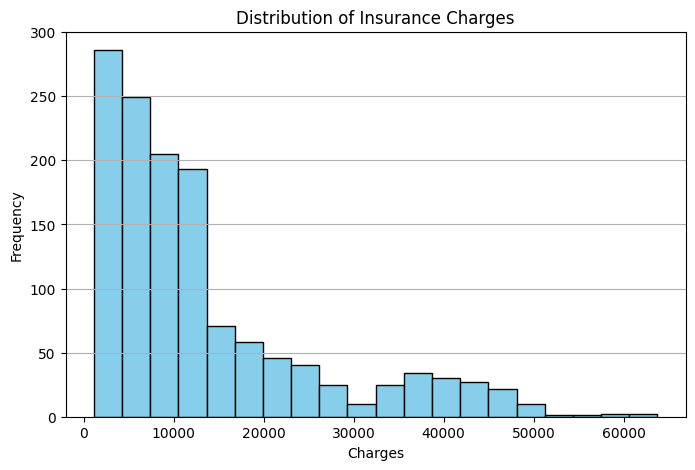

In [18]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.hist(df['charges'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Insurance Charges')
plt.xlabel('Charges')
plt.ylabel('Frequency')
plt.grid(axis='y')
plt.show()


As you can see, I forgot to add the meaning of what the charges are measured by. I redid the code and added dollars to make it more clear.

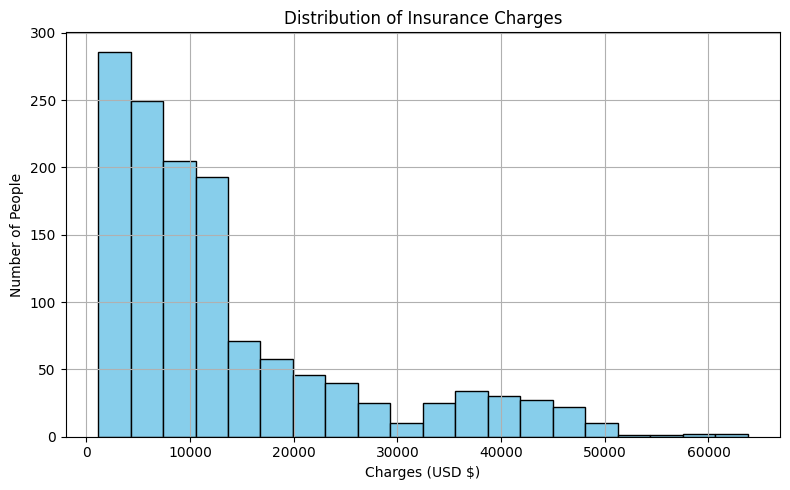

In [19]:
plt.figure(figsize=(8, 5))
plt.hist(df['charges'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Insurance Charges')
plt.xlabel('Charges (USD $)')  # <- shows units
plt.ylabel('Number of People')
plt.grid(True)
plt.tight_layout()
plt.show()


The plot above now shows the final visual of the 'Distrubtion of Insurance Charges' and perfect for spotting skewed or normal spread. I have also gone ahead and labeled the Y- Axis 'Number of People' and X - Axis 'Charges in USD' and the dollar is commonly used.

Plot 3 - Interactive Scatter Plot 

In [20]:
import plotly.express as px

In [27]:
fig = px.scatter(
    df, 
    x="bmi", 
    y="charges", 
    color="smoker", 
    title="BMI vs Insurance Charges"
)  
fig.show()


This is Interactive plot which shows the comparisons on the BMI vs Insurance Charges. Each dot represents one person.
The X-Axis (bmi) shows the body mass of the individuals, the Y-Axis (charges) shows the insurance charges in dollars of each individual, colour(smoker) indicating if the person is a smoker or not. 

The smokers (red points) tend to have much higher insurance compared to the non- smoker even if ther BMI is the same as non=smokers. 
This shows that BMI alone doesn't strongly affect the charges, unless its combined with smoking.

The Outliners here are visible. Some individuals with very high BMIs and high charges stand out - This is a useful point to highlight unusual or extreme cases.



## To Summarise

Upon embarking on this project for the client, I would say that the focus was trying to find the best angle on what to tackle and the best way to position myself when it comes to presenting the best datasets. It soon became aparent that the best option would be to keep it general whilst leaving room for interpretation. I tried my best to avoid the biased route as picking a typical 'smokers vs non- smokers' argument seemed quite narrow as it would take away the issues that the general public are facing which is pricing. This method allows room for interpretation as the client will now have a better understanding on; BMI, Age and Charges, which still factoring the smokers and non- smokers of the groups. The data visuals was an ideal route to take as it kept the data clear and easy to read whilst also showing the original data, that had been; cleaned, transformed and validated. 

To finalise, the scatter plot of BMI vs insurance charges revealed that smoking status has a significant impact on insurance costs. Non-smokers tend to have relatively stable charges across BMI levels, while smokers—particularly those with higher BMIs—face substantially higher charges.
This highlights the strong influence of lifestyle choices, such as smoking, on healthcare costs and underscores the importance of preventive measures in managing insurance expenses. 